# <h1><center>**`Employee Attrition Problem`**</center></h1>

**Business Aspect:**

Manager is very disturbed because the employee in his company are leaving the company due to various reasons. 

**Problem Statement:**

To predict the salary of employee based on the information provided in dataset & find out the reason of attrition




### `Dataset Desciption`

The dataset folder contains the following files:

**train_dataset.csv** = 1000000 x 8

**train_salaries.csv** = 1000000 x 2

**test_dataset.csv** =  1000000 x 8

Columns Provided in the Dataset

1. **jobId** - Unique ID that indicates the employee
2. **companyId** - Unique ID that idicates the company
3. **jobType** - Shows which post the employee is working for the company
4. **degree** - shows which degree is completed by the employee
5. **major** - shows the field in which the employee is specialised in
6. **industry** - show the industry in which the employee is working
7. **yearsExperience** - years of working experience the employee is having
8. **milesFromMetropolis** - distance in miles between the comapny and his house
9. **salary** - salary given to the employee.
eg. 250 indicates 2,50,000 in dollars

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm#tqdm makes the looping fast even if there are high no_of_rows

In [2]:
train_data = pd.read_csv('train_dataset.csv')
train_data_salaries = pd.read_csv('train_salaries.csv')
test_data = pd.read_csv('test_dataset.csv')

In [3]:
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
train_data_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [6]:
train_data =  pd.merge(train_data,train_data_salaries,on='jobId')
train_data.head(1)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130


In [7]:
train_data.shape

(1000000, 9)

In [8]:
#salaries less that $30000 can be removed as such salary per month is not expected. It must b because of error
train_data = train_data[train_data['salary']>30]

In [9]:
train_data.shape

(997548, 9)

# Basic EDA

In [10]:
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [13]:
train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,997548.000000,997548.000000,997548.000000
mean,12.015214,49.458372,116.280462
std,7.204992,28.863518,38.512936
min,0.000000,0.000000,31.000000
25%,6.000000,24.000000,89.000000
50%,12.000000,49.000000,114.000000
75%,18.000000,74.000000,141.000000
max,24.000000,99.000000,301.000000


In [14]:
test_data.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [15]:
print("train data length: ",len(train_data))
print("test data length: ",len(test_data))

train data length:  997548
test data length:  1000000


In [16]:
train_data.nunique()

jobId                  997548
companyId                  63
jobType                     8
degree                      5
major                       9
industry                    7
yearsExperience            25
milesFromMetropolis       100
salary                    265
dtype: int64

In [17]:
test_data.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
dtype: int64

In [18]:
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [19]:
test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [20]:
# drop jobId and companyId from train_dataset as mostly unique values
train_data = train_data.drop(['jobId','companyId'], axis=1)
train_data 

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,CFO,MASTERS,NONE,HEALTH,6,5,149


In [21]:
test_data = test_data.drop(['jobId','companyId'], axis=1)
test_data 

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,MANAGER,NONE,NONE,HEALTH,20,67
999997,JANITOR,NONE,NONE,OIL,1,91
999998,CTO,DOCTORAL,MATH,OIL,14,63


In [22]:
categorical_list = []
var_list = []

for x in train_data.columns:
  if train_data[x].dtype =='object':
    categorical_list.append(x)
  elif train_data[x].dtype =='int64':
    var_list.append(x)
  elif train_data[x].dtype =='float64':
    var_list.append(x)

In [23]:
print(categorical_list)
print(var_list)

['jobType', 'degree', 'major', 'industry']
['yearsExperience', 'milesFromMetropolis', 'salary']


In [24]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.00,0.00,0.37
milesFromMetropolis,0.00,1.00,-0.29
salary,0.37,-0.29,1.00


## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

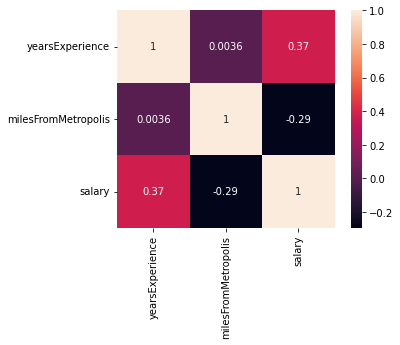

In [25]:
# Correlation metrix using seaborn
sns.heatmap(corr,annot=True, square=True)
plt.show()

## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent. In alternate hypothesis, there is relationship. If pvalue is less than 0.05, we reject null hypothesis.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.


6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [26]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1,var_2):
    
    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1],train_data[var_2])
    #matrix in which we will have unique values in rows & unique values in columns
    
    #Observed Values
    observed_values = contingency_table.values
    
    #Expected Values
    b = chi2_contingency(contingency_table)
    expected_values = b[3]
    
    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0]) #all rows & 1 columns
    no_of_columns = len(contingency_table.iloc[0,0:])#  1row & all column
    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom: ",degree_f)
    
    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)
    
    #chi-square statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values, expected_values)])
    chi_square_statistic = chi_square[0] + chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)
    
    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    print('critical_value:',critical_value)
    
    #p-value
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=degree_f)

    print('p-value:',p_value)
          
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [27]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for x in categorical_list:
    for i in categorical_list:
        if i != x:
            print('chi-square test on: ',x,' ',i,'\n')
            perform_chi_square_test(x,i)
            print('-------------------------------------------------------------------\n')

chi-square test on:  jobType   degree 

Degree of Freedom:  28
Significance level:  0.05
chi-square statistic:  49153.86411257831
critical_value: 41.33713815142739
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   major 

Degree of Freedom:  56
Significance level:  0.05
chi-square statistic:  16381.915810303108
critical_value: 74.46832415930936
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   industry 

Degree of Freedom:  42
Significance level:  0.05
chi-square statistic:  100.30610291761408
critical_value: 58.12403768086803
p-value: 1.1246299327360987e-06
Reject H0,There is a relationship between 2 c

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot

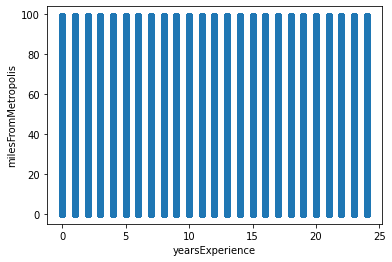

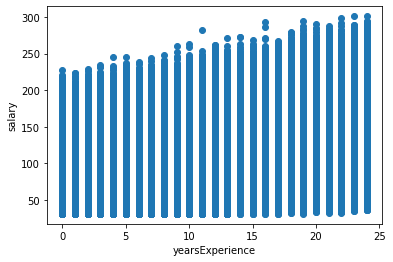

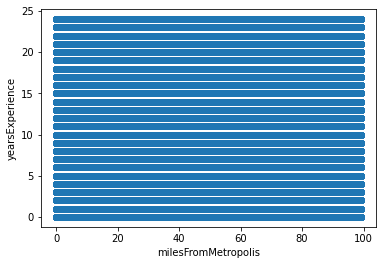

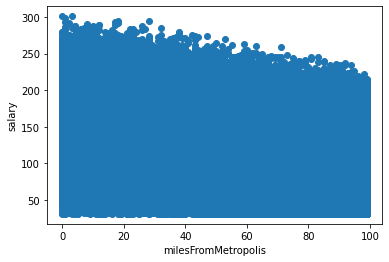

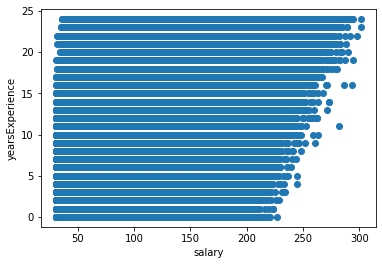

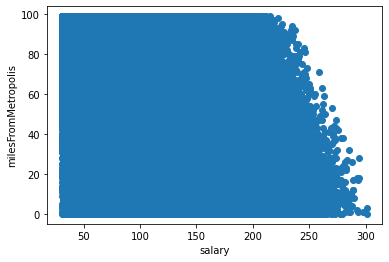

In [28]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
  plt.figure()
  plt.xlabel(x)
  plt.ylabel(y)
  plt.scatter(train_data[x], train_data[y])

# Loop through the different columns 
for i in var_list:
    for j in var_list:
        if i != j:
            plot_scatter(i, j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

array([[<AxesSubplot:title={'center':'yearsExperience'}>,
        <AxesSubplot:title={'center':'milesFromMetropolis'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>]],
      dtype=object)

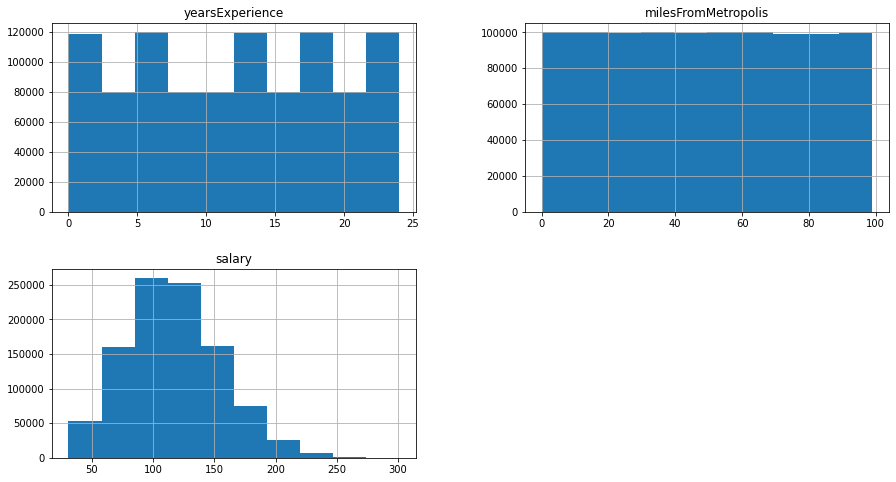

In [29]:
train_data.hist(figsize=(15,8))# Histogram using pandas 

From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


<AxesSubplot:>

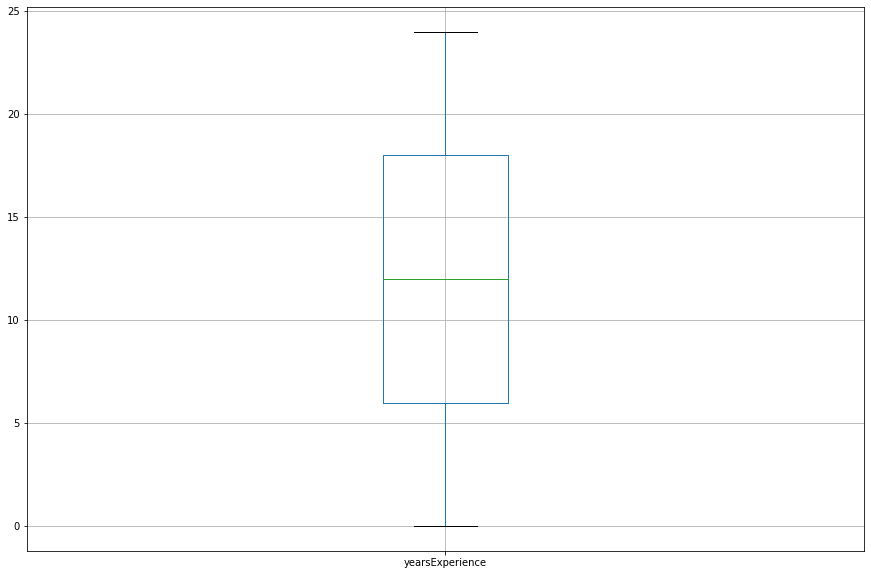

In [30]:
train_data.boxplot(column='yearsExperience', figsize=(15, 10))# box plot using pandas 

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

<AxesSubplot:>

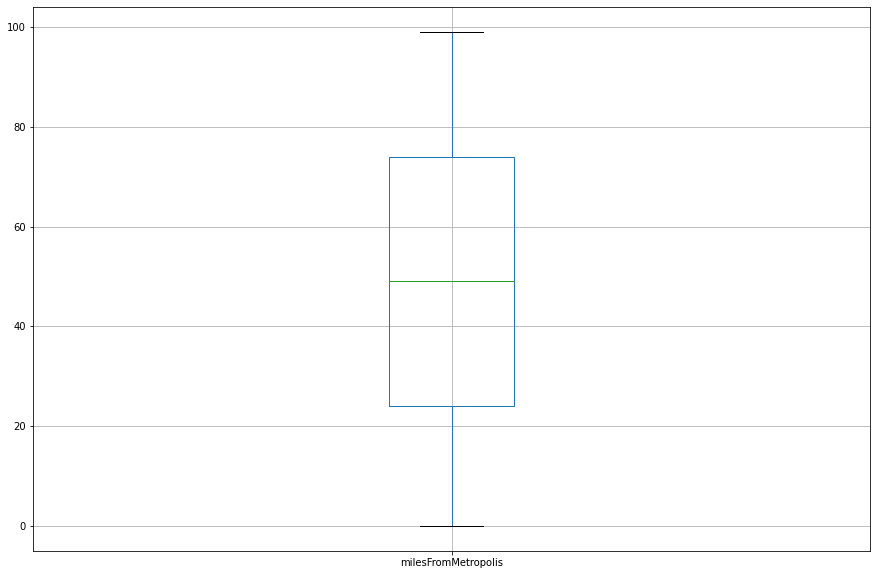

In [31]:
train_data.boxplot(column='milesFromMetropolis', figsize=(15, 10))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

<AxesSubplot:>

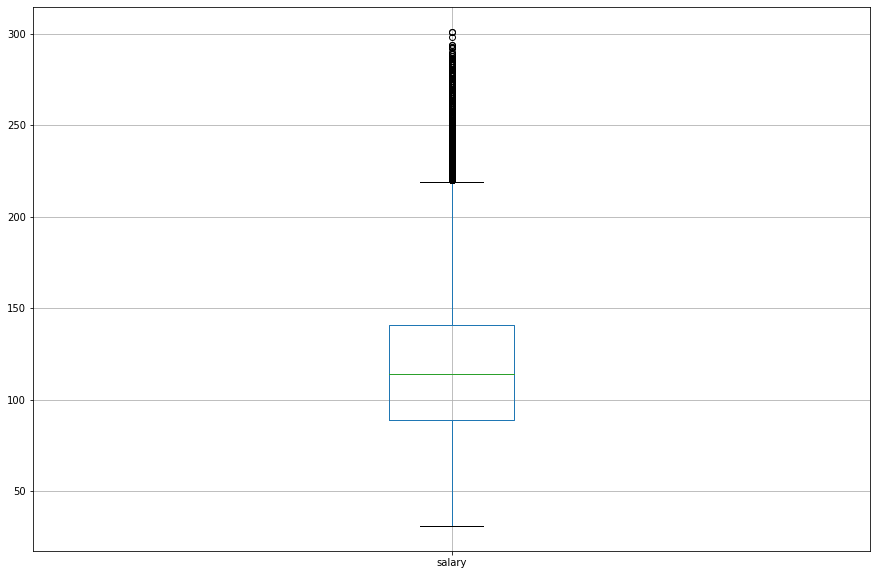

In [32]:
train_data.boxplot(column='salary', figsize=(15, 10))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120


## Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

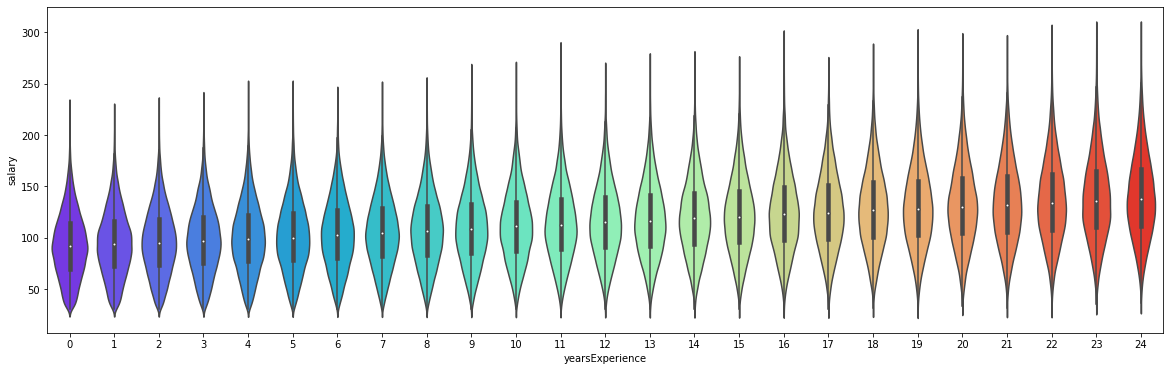

In [33]:
# Violin plots are similar to box plots, except that they also show the probability density of the data at different values
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience', y='salary', data=train_data, palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

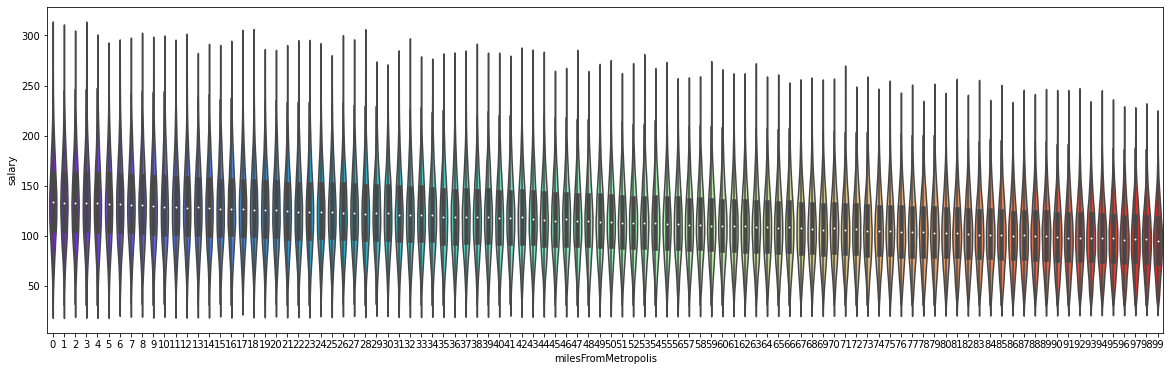

In [34]:
plt.figure(figsize=(20,6))
sns.violinplot(x='milesFromMetropolis', y='salary', data=train_data, palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

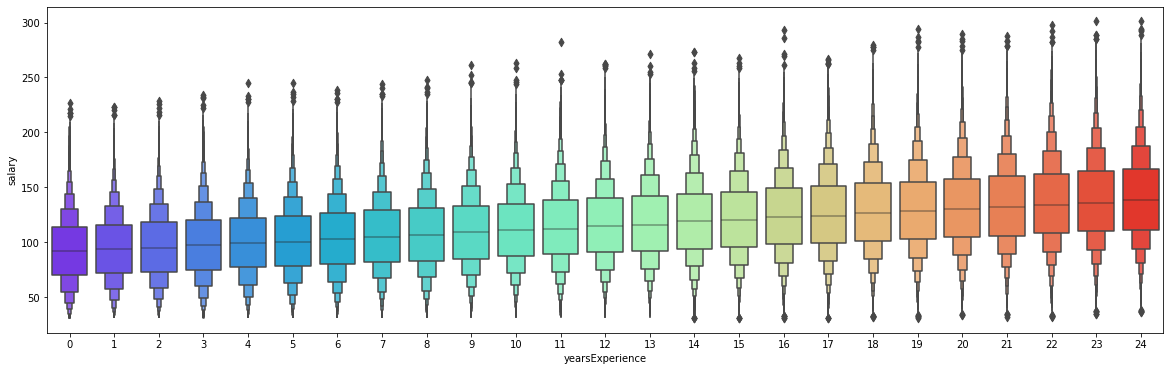

In [35]:
#The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).
#The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience', y='salary', data=train_data, palette='rainbow')

<AxesSubplot:xlabel='yearsExperience', ylabel='count'>

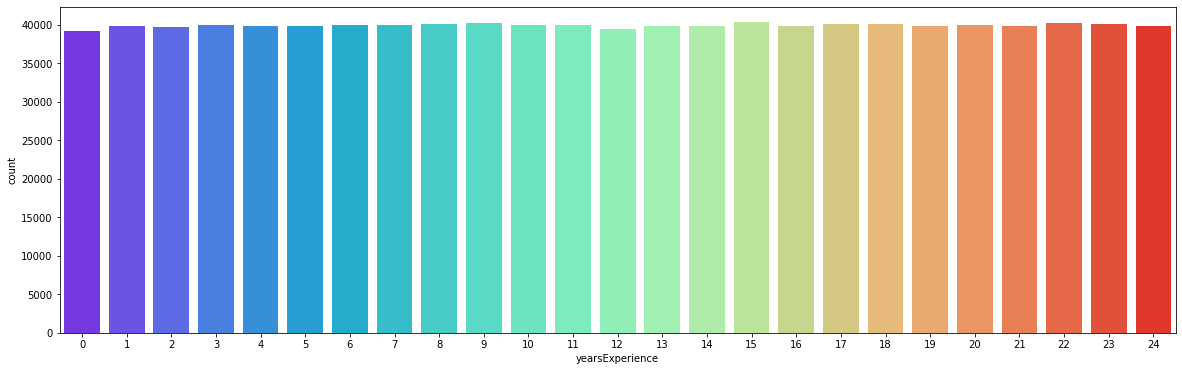

In [36]:
plt.figure(figsize=(20,6))
sns.countplot(x="yearsExperience", data=train_data, palette='rainbow')

From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='count'>

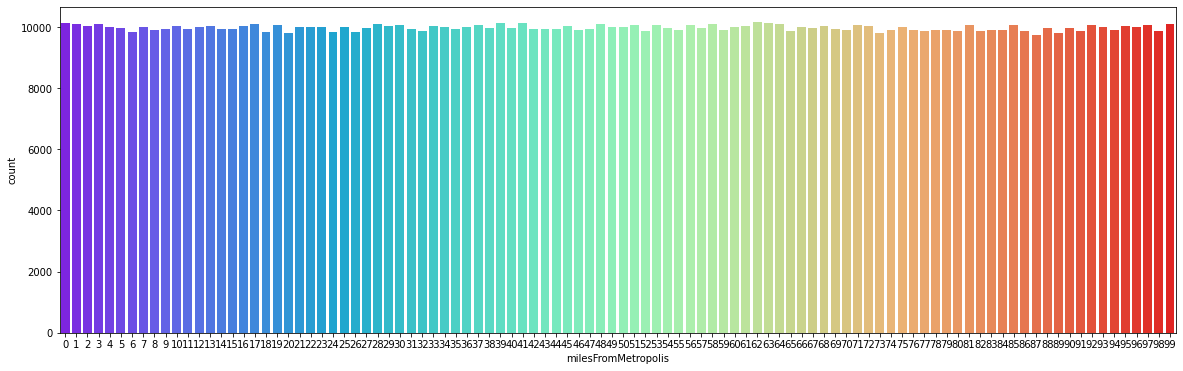

In [37]:
plt.figure(figsize=(20,6))
sns.countplot(x="milesFromMetropolis", data=train_data, palette='rainbow')

From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

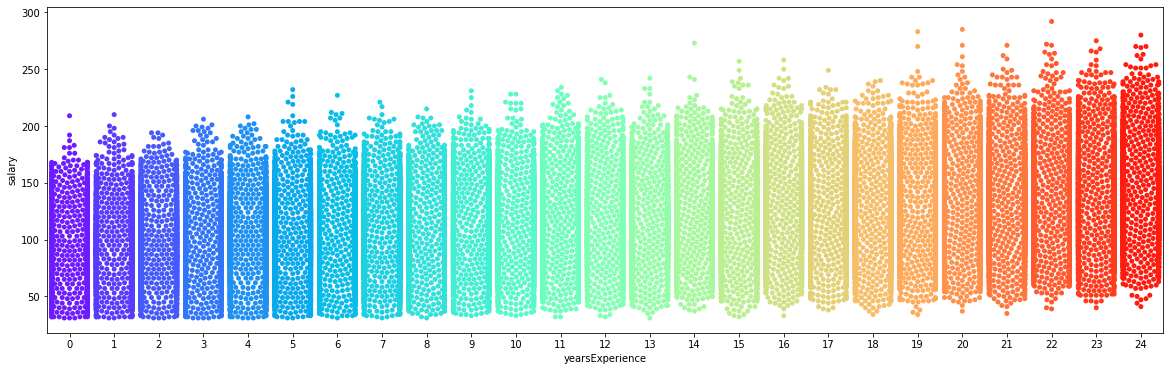

In [38]:
plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience', y='salary', data=train_data.iloc[1:50000],palette='rainbow')
#The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.
#ploting data on 50000 of 1000000 sample for clear visualization.

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

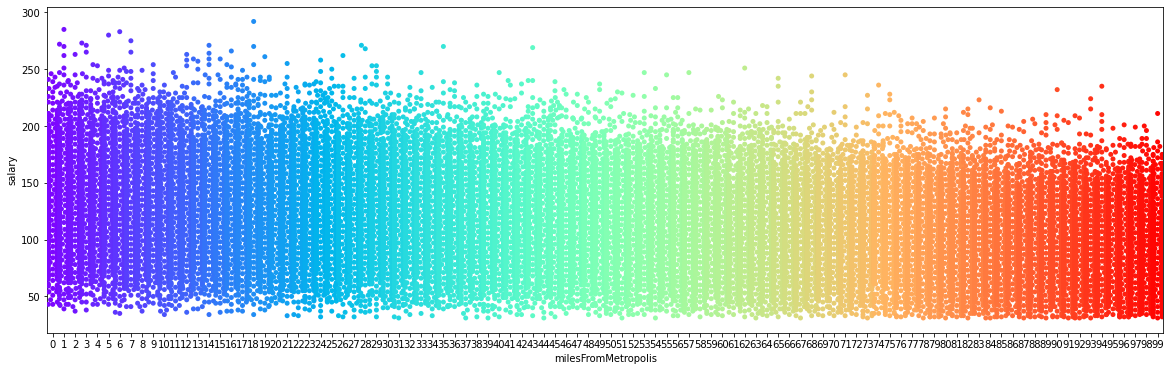

In [39]:
# swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='milesFromMetropolis', y='salary', data=train_data.iloc[1:50000],palette='rainbow')

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

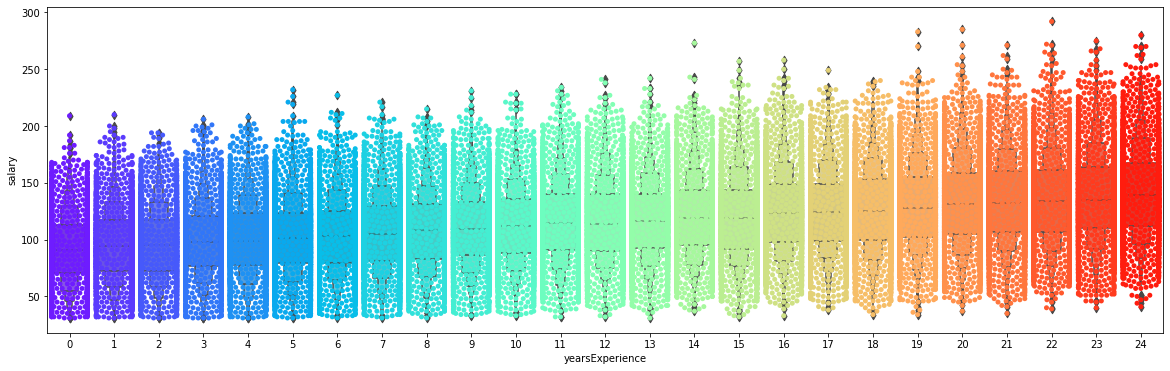

In [40]:
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience', y='salary', data=train_data.iloc[1:50000],palette='rainbow')
sns.swarmplot(x='yearsExperience', y='salary', data=train_data.iloc[1:50000],palette='rainbow')

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

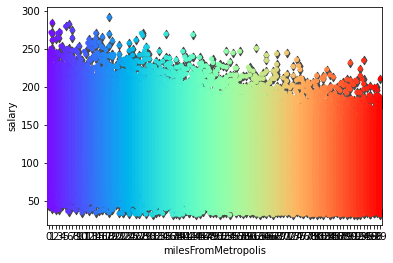

In [41]:
#plt.figure(figsize=(20,6))
sns.boxenplot(x='milesFromMetropolis', y='salary', data=train_data.iloc[1:50000],palette='rainbow')
sns.swarmplot(x='milesFromMetropolis', y='salary', data=train_data.iloc[1:50000],palette='rainbow')

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

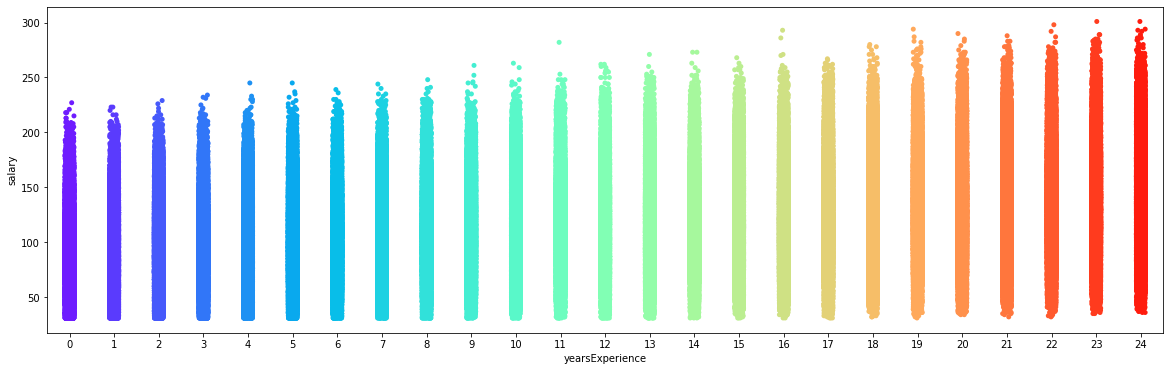

In [42]:
#strip plot is a graphical data anlysis technique for summarizing a univariate data set.
plt.figure(figsize=(20,6))
sns.stripplot(x='yearsExperience', y='salary', data=train_data,palette='rainbow')

from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

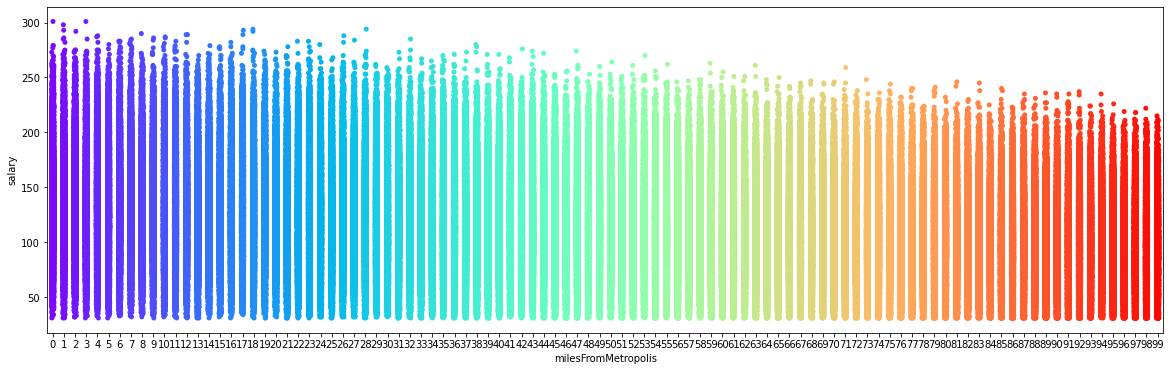

In [43]:
plt.figure(figsize=(20,6))
sns.stripplot(x='milesFromMetropolis', y='salary', data=train_data,palette='rainbow')

from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

In [44]:
import statsmodels.api as sm

In [45]:
train_for_vif = train_data.select_dtypes(include=np.number)
train_for_vif=train_for_vif.drop(['salary'],axis=1)
target = train_data['salary']
names = ['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
names

['yearsExperience', 'milesFromMetropolis']

In [46]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  # taking one column as target variable
  y = train_for_vif.loc[:,train_for_vif.columns==names[i]]
  # taking all other remaining columns as fetaure variable
  x = train_for_vif.loc[:,train_for_vif.columns!=names[i]]
  # firting the OLS model on y and x
  model = sm.OLS(y,x)
  results = model.fit()
  # geting the r^2 value of results.
  rsq = results.rsquared
  # calculating vif value
  vif = round(1/(1-rsq),2)
  print("R Square value of {} column is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

R Square value of yearsExperience column is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.22 

R Square value of milesFromMetropolis column is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.22 



Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.

### Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

### Homogeneity of variance Assumption Check

### Hypothesis Testing

In [47]:
#Whenever there is numerical & categorical variable & w want to determine whether there is any relation. We perform annova test
# perform anova test between two variables.

def perform_anova_test(x,y):
  # two variables of interest
  train_anova = train_data[[x,y]]
  groups = train_anova.groupby(x).count().reset_index()
  # groups.plot(kind='bar',x='major',y='salary')
  print(groups)


  unique_majors = train_anova[x].unique()
  for major in unique_majors:
      stats.probplot(train_anova[train_anova[x] == major][y], dist="norm", plot=plt)
      plt.title("Probability Plot - " +  str(major))
      plt.show()


  # calculate ratio of the largest to the smallest sample standard deviation
  ratio =train_anova.groupby(x).std().max() / train_anova.groupby(x).std().min()
  print(ratio)


  # Create ANOVA backbone table
  data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
  anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'])    
  #ss=sum of squares source, ms=mean sum of squares source
  anova_table.set_index('Source of Variation', inplace = True)

  # calculate SSTR and update anova table
  x_bar = train_anova[y].mean()
  SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
  anova_table['SS']['Between Groups'] = SSTR[y].sum()

  # calculate SSE and update anova table
  SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
  anova_table['SS']['Within Groups'] = SSE[y].sum()

  # calculate SSTR and update anova table
  SSTR = SSTR[y].sum() + SSE[y].sum()
  anova_table['SS']['Total'] = SSTR

  # update degree of freedom
  anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
  anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
  anova_table['df']['Total'] = train_anova.shape[0] - 1

  # calculate MS
  anova_table['MS'] = anova_table['SS'] / anova_table['df']

  # calculate F 
  F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups'] = F

  # p-value
  anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # F critical 
  alpha = 0.05
  # possible types "right-tailed, left-tailed, two-tailed"
  tail_hypothesis_type = "two-tailed"
  if tail_hypothesis_type == "two-tailed":
      alpha /= 2
  anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # Final ANOVA Table
  print(anova_table)


  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['P-value']['Between Groups'] <= alpha:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
  print(conclusion)
      
  # The critical value approach
  print("\n--------------------------------------------------------------------------------------")
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
  print(conclusion)

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58594
5   LITERATURE   58684
6         MATH   57800
7         NONE  529906
8      PHYSICS   58410


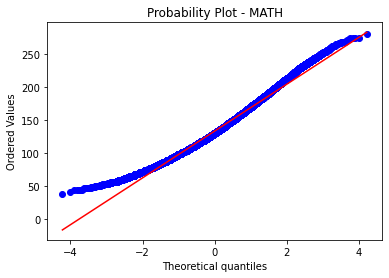

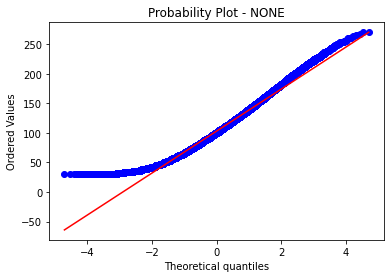

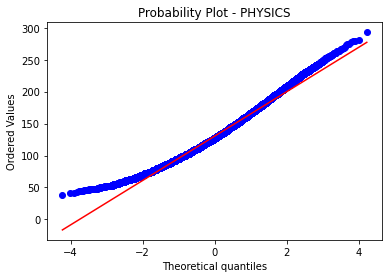

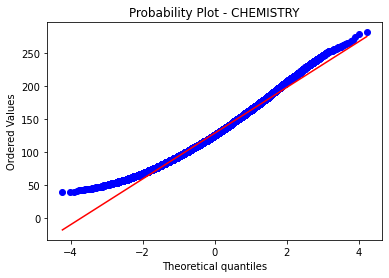

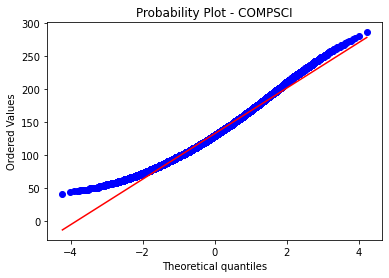

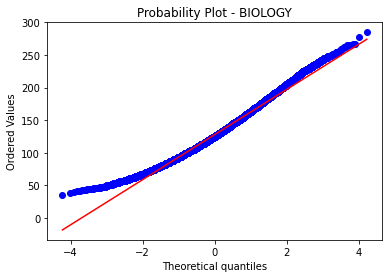

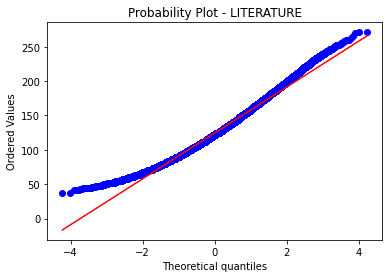

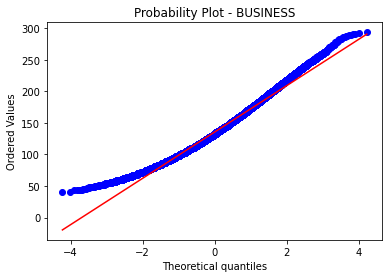

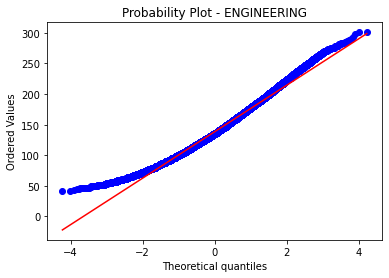

salary    1.137076
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        209547309.494914       8  26193413.686864  20572.997068   
Within Groups        1270060536.615651  997539      1273.193867                 
Total                1479607846.110565  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.191831  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 20572.997067846136  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 2

In [48]:
perform_anova_test('major','salary')

          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125045
3         JANITOR  122562
4          JUNIOR  124554
5         MANAGER  125120
6          SENIOR  125886
7  VICE_PRESIDENT  125234


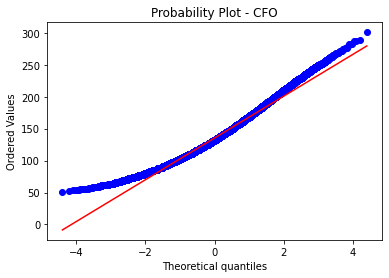

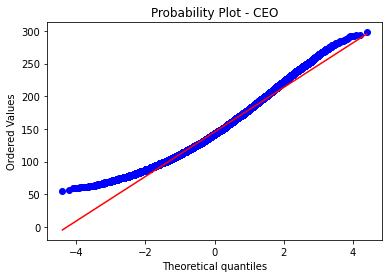

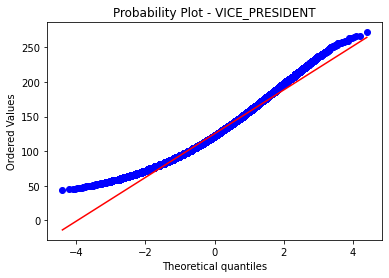

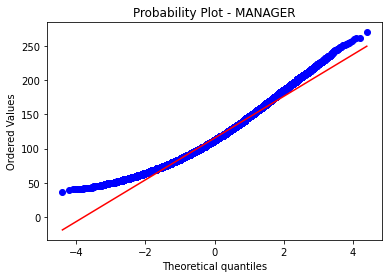

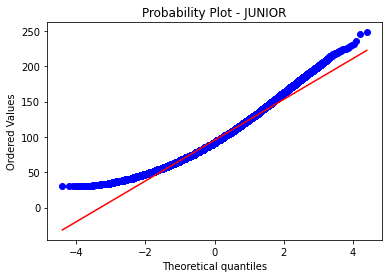

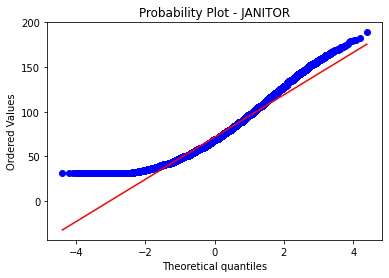

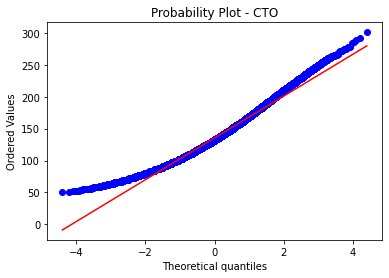

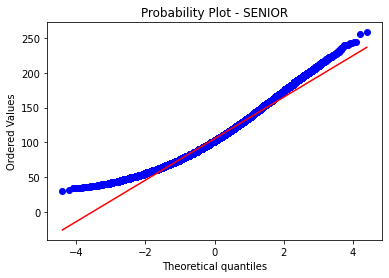

salary    1.428316
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        520557906.406689       7  74365415.200956  77349.961883   
Within Groups         959049939.703873  997540       961.415021                 
Total                1479607846.110561  997547      1483.246249                 

                    P-value   F crit  
Source of Variation                   
Between Groups          0.0  2.28755  
Within Groups                         
Total                                 
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 77349.96188255494  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 77349.9

In [49]:
perform_anova_test('jobType','salary')

          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125045
3         JANITOR  122562
4          JUNIOR  124554
5         MANAGER  125120
6          SENIOR  125886
7  VICE_PRESIDENT  125234


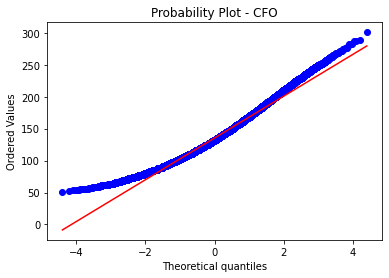

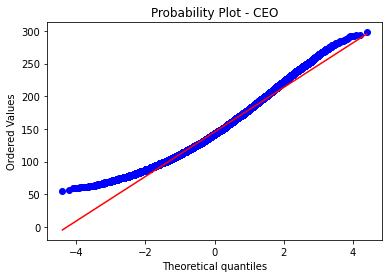

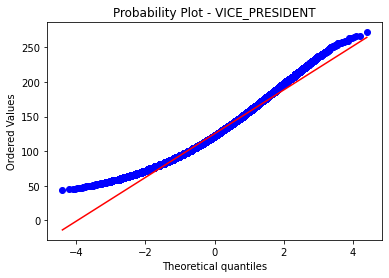

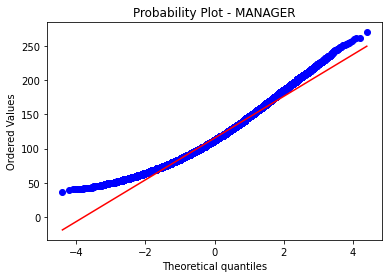

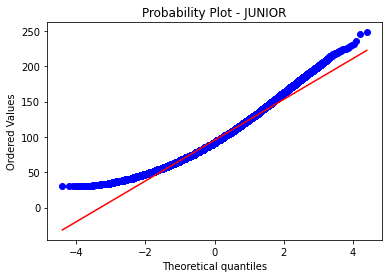

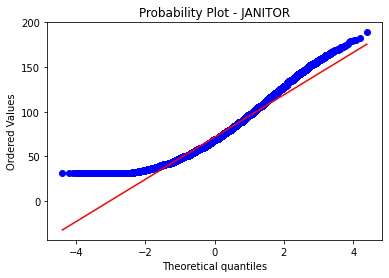

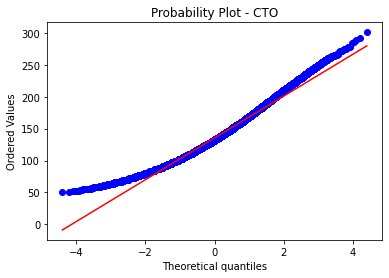

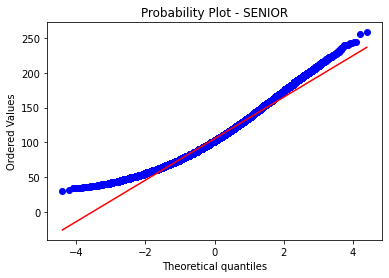

salary    1.428316
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        520557906.406689       7  74365415.200956  77349.961883   
Within Groups         959049939.703873  997540       961.415021                 
Total                1479607846.110561  997547      1483.246249                 

                    P-value   F crit  
Source of Variation                   
Between Groups          0.0  2.28755  
Within Groups                         
Total                                 
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 77349.96188255494  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 77349.9

In [50]:
perform_anova_test('jobType','salary')

        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175362
2  HIGH_SCHOOL  235769
3      MASTERS  175310
4         NONE  235612


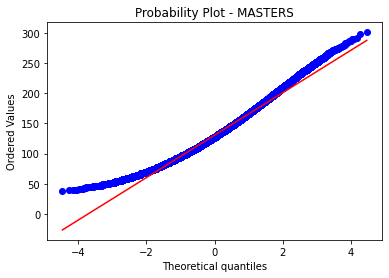

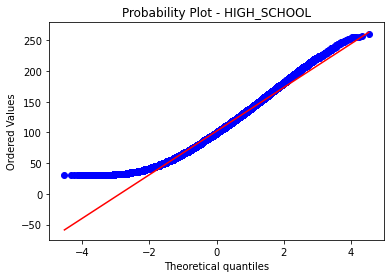

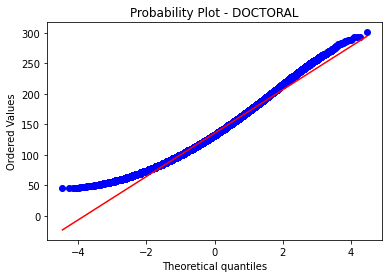

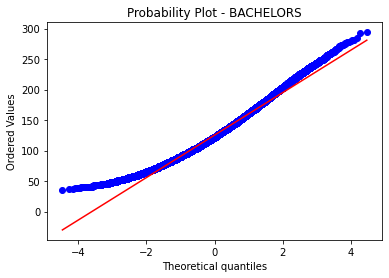

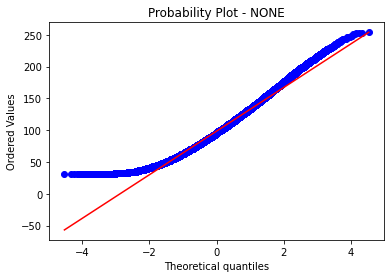

salary    1.034168
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        235082352.781875       4  58770588.195469  47107.262306   
Within Groups        1244525493.328681  997543      1247.590824                 
Total                1479607846.110556  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.785834  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 47107.26230562572  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 47

In [51]:
perform_anova_test('degree','salary')

        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175362
2  HIGH_SCHOOL           235769
3      MASTERS           175310
4         NONE           235612


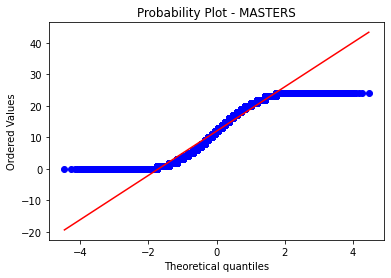

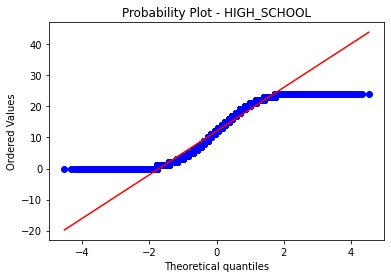

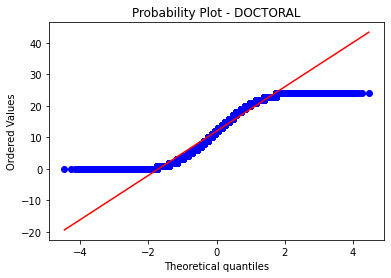

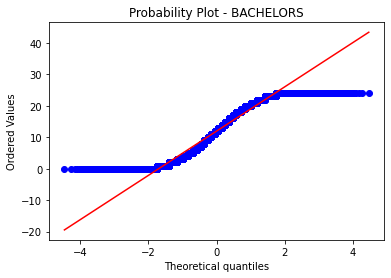

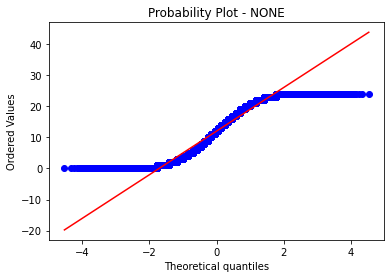

yearsExperience    1.003202
dtype: float64
                                  SS      df          MS         F  P-value  \
Source of Variation                                                           
Between Groups            667.587348       4  166.896837  3.215029  0.01198   
Within Groups        51783902.505138  997543   51.911449                      
Total                51784570.092486  997547    51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.785834  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and p value is: 0.011980261991255126
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and critical value is: 2

In [52]:
perform_anova_test('degree','yearsExperience')

        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175362
2  HIGH_SCHOOL           235769
3      MASTERS           175310
4         NONE           235612


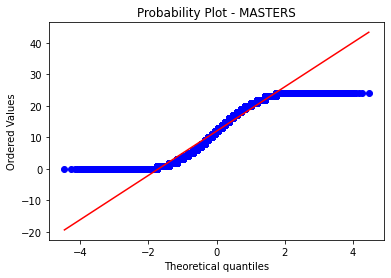

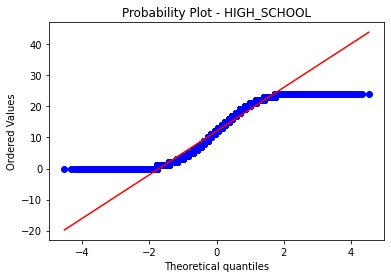

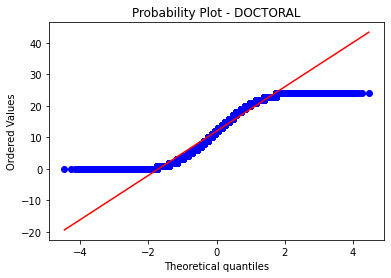

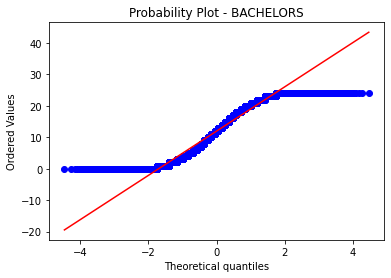

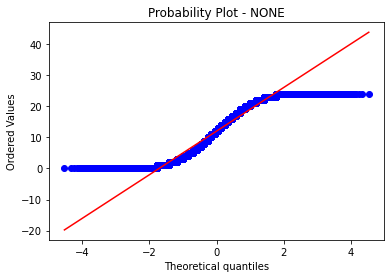

yearsExperience    1.003202
dtype: float64
                                  SS      df          MS         F  P-value  \
Source of Variation                                                           
Between Groups            667.587348       4  166.896837  3.215029  0.01198   
Within Groups        51783902.505138  997543   51.911449                      
Total                51784570.092486  997547    51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.785834  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and p value is: 0.011980261991255126
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and critical value is: 2

In [53]:
perform_anova_test('degree','yearsExperience')

        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175362
2  HIGH_SCHOOL           235769
3      MASTERS           175310
4         NONE           235612


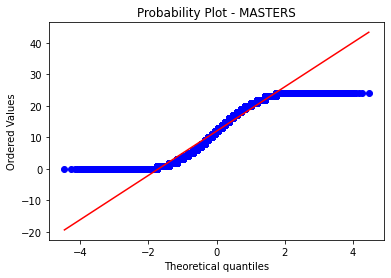

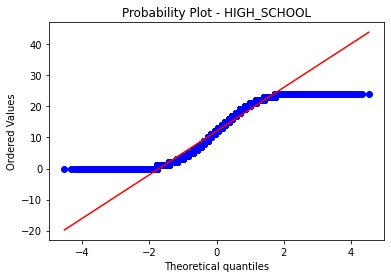

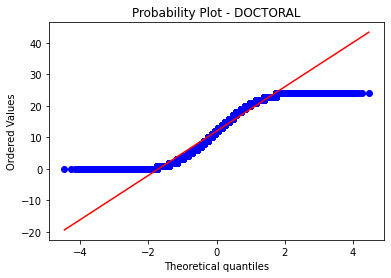

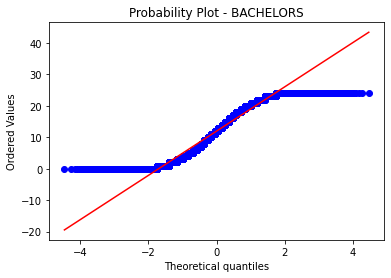

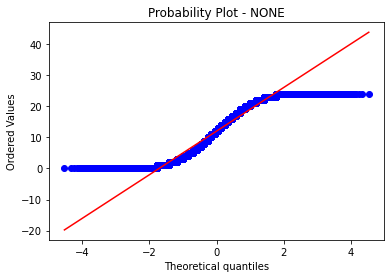

yearsExperience    1.003202
dtype: float64
                                  SS      df          MS         F  P-value  \
Source of Variation                                                           
Between Groups            667.587348       4  166.896837  3.215029  0.01198   
Within Groups        51783902.505138  997543   51.911449                      
Total                51784570.092486  997547    51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.785834  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and p value is: 0.011980261991255126
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and critical value is: 2

In [54]:
perform_anova_test('degree','yearsExperience')

        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175362
2  HIGH_SCHOOL           235769
3      MASTERS           175310
4         NONE           235612


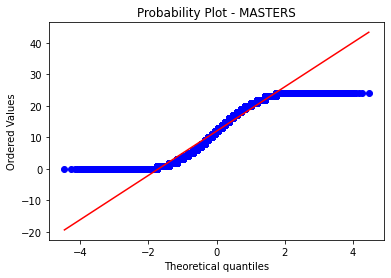

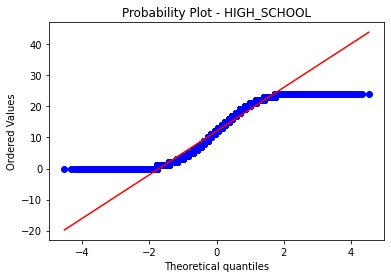

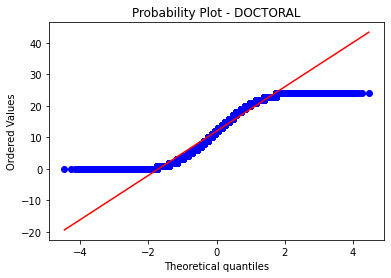

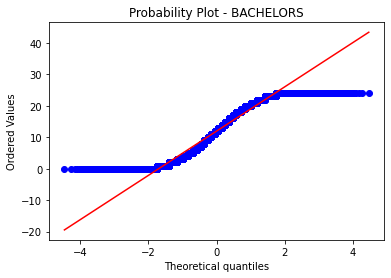

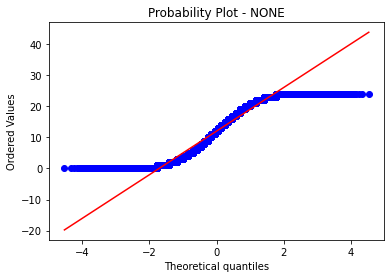

yearsExperience    1.003202
dtype: float64
                                  SS      df          MS         F  P-value  \
Source of Variation                                                           
Between Groups            667.587348       4  166.896837  3.215029  0.01198   
Within Groups        51783902.505138  997543   51.911449                      
Total                51784570.092486  997547    51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.785834  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and p value is: 0.011980261991255126
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and critical value is: 2

In [55]:
perform_anova_test('degree','yearsExperience')

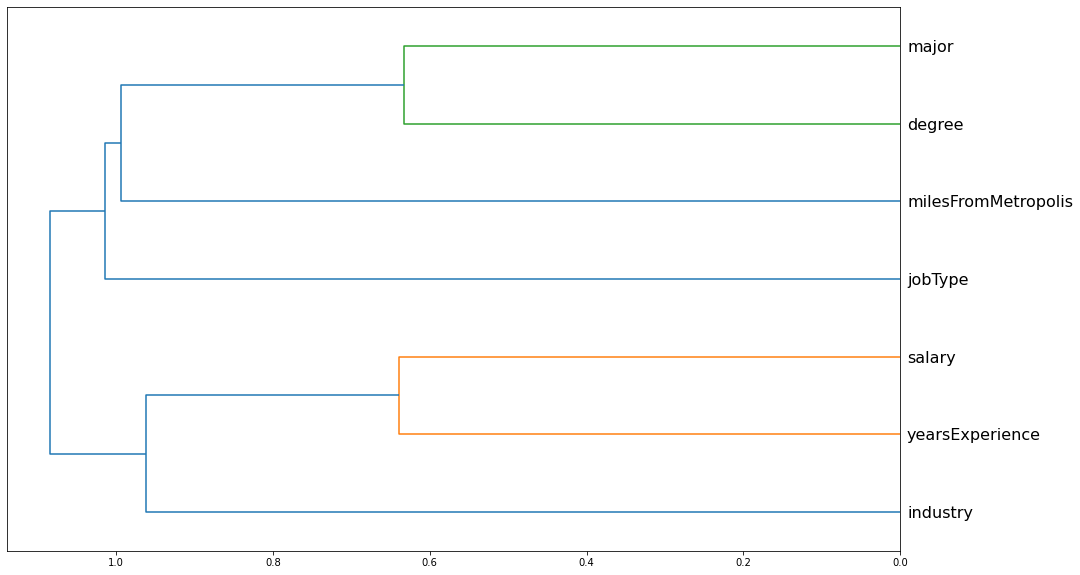

In [56]:
X = train_data[1:50000]

import scipy
from scipy.cluster import hierarchy as hc
from scipy.cluster.hierarchy import dendrogram, linkage
corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z,labels=X.columns, orientation='left', leaf_font_size=16)
plt.show()

observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

In [57]:
from sklearn.preprocessing import MinMaxScaler
def scale_data(df,col):
  
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[col])
  return df

In [58]:
col_train = ['yearsExperience','milesFromMetropolis']
train_data = scale_data(train_data, col_train)

In [59]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):
    
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False
        
    # helper function to fit data  
    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out
    
    # helper function to transform data  
    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out
    
    # helper function to fit and transform data 
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)
    
    # helper function to get new column names after fitting and tranforming data 
    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns

In [60]:
train_X = train_data[['jobType', 'degree', 'major', 'industry']]
train_Y = train_data['salary']

In [61]:
train_X.head()

,jobType,degree,major,industry
0,CFO,MASTERS,MATH,HEALTH
1,CEO,HIGH_SCHOOL,NONE,WEB
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE


In [62]:
train_Y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [63]:
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_X)
train_X = train_X.join(train_data['yearsExperience'])
train_X = train_X.join(train_data['milesFromMetropolis'])

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size= 0.2)

In [65]:
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

def rmse(x,y): 
  return math.sqrt(((x-y)**2).mean())
    
    


def print_score(m):
    res =[rmse(m.predict(X_train), Y_train), rmse(m.predict(X_test), Y_test),
          m.score(X_train, Y_train),m.score(X_test, Y_test),
          median_absolute_error(m.predict(X_train), Y_train), median_absolute_error(m.predict(X_test), Y_test),
          metrics.mean_absolute_error(m.predict(X_train), Y_train), metrics.mean_absolute_error(m.predict(X_test), Y_test),
    ]

    
    

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


In [66]:
%%time
from sklearn.linear_model import LinearRegression
lModel = LinearRegression()
lModel.fit(X_train,Y_train)
print_score(lModel)

RMSE-Train: 19.62820594126356
RMSE-Test: 19.62208709752967
Score-Train: 0.740276235218068
Score-Test: 0.7403281162787946
MedAE-Train: 13.7734375
MedAE-Test: 13.734375
MeanAE-Train: 15.87044497137041
MeanAE-Test: 15.867379493822364 

CPU times: user 2.55 s, sys: 721 ms, total: 3.27 s
Wall time: 2.33 s


In [67]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train.iloc[1:50000],Y_train[1:50000])
print_score(rf)

RMSE-Train: 20.028599311180507
RMSE-Test: 20.557006322333212
Score-Train: 0.7295720139102002
Score-Test: 0.714993825330241
MedAE-Train: 13.100000000000001
MedAE-Test: 13.950000000000003
MeanAE-Train: 15.816987415473621
MeanAE-Test: 16.43540572696285 

CPU times: user 2min 33s, sys: 417 ms, total: 2min 34s
Wall time: 2min 34s


In [68]:
%%time
from sklearn.neighbors import KNeighborsRegressor
knnr =KNeighborsRegressor()
knnr.fit(X_train.iloc[1:10000],Y_train[1:10000])
print_score(knnr)

RMSE-Train: 23.910121979422364
RMSE-Test: 23.942224369594857
Score-Train: 0.6145979140390936
Score-Test: 0.6133985104622238
MedAE-Train: 15.199999999999989
MedAE-Test: 15.199999999999989
MeanAE-Train: 18.610995466381308
MeanAE-Test: 18.646447797102905 

CPU times: user 7min 5s, sys: 1.29 s, total: 7min 6s
Wall time: 4min 18s


In [69]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(X_train.iloc[1:50000],Y_train[1:50000])
print_score(GBR)


RMSE-Train: 19.421727670221294
RMSE-Test: 19.42437249547402
Score-Train: 0.745711805710068
Score-Test: 0.7455347249460387
MedAE-Train: 13.626019582000296
MedAE-Test: 13.650742409947988
MeanAE-Train: 15.684667138678035
MeanAE-Test: 15.682782264646946 

CPU times: user 14.5 s, sys: 261 ms, total: 14.7 s
Wall time: 14.7 s


In [70]:
%%time
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train.iloc[1:50000],Y_train[1:50000])
print_score(DTR)

RMSE-Train: 26.905870128594668
RMSE-Test: 27.746391978042183
Score-Train: 0.5119722013466659
Score-Test: 0.4807846003919066
MedAE-Train: 16.0
MedAE-Test: 17.0
MeanAE-Train: 20.310872205751274
MeanAE-Test: 21.596915359296943 

CPU times: user 1.92 s, sys: 80 ms, total: 2 s
Wall time: 1.98 s


In [71]:
%%time
from sklearn.ensemble import AdaBoostRegressor
AdaBoost = AdaBoostRegressor()
AdaBoost.fit(X_train.iloc[1:50000],Y_train[1:50000])
print_score(AdaBoost)

RMSE-Train: 25.11372192085011
RMSE-Test: 25.069052332017502
Score-Train: 0.5748201839825609
Score-Test: 0.5761517795493281
MedAE-Train: 19.180672268907557
MedAE-Test: 19.17437664041995
MeanAE-Train: 20.910677078382435
MeanAE-Test: 20.871228464575722 

CPU times: user 30.1 s, sys: 6.48 s, total: 36.6 s
Wall time: 36.7 s


In [72]:
%%time
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train.iloc[1:50000],Y_train[1:50000])
print_score(xgbr) 

RMSE-Train: 19.337792842612775
RMSE-Test: 19.443705445608195
Score-Train: 0.7479049695465683
Score-Test: 0.7450279376426425
MedAE-Train: 13.468765258789062
MedAE-Test: 13.51949691772461
MeanAE-Train: 15.59635432394214
MeanAE-Test: 15.680252670535504 

CPU times: user 32.4 s, sys: 77.9 ms, total: 32.5 s
Wall time: 18.9 s


### Comparing all the model based on metric

In [73]:
# the libraries we need
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
def compare_models(models,names,X_train,y_train,X_test,y_test):


    # now, create a list with the objects 
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test) # then predict on the test set
      res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
                metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
                metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
                metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
      df_train[name] = [res[0], res[2], res[4], res[6]]
      df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train,df_test

In [74]:
models= [DTR, rf, knnr, GBR, xgbr, AdaBoost]
names = ['Dtree', 'Forest', 'Knn', 'GBR', 'xboost', 'AdaBoost'] 
comp_model_train, comp_model_test = compare_models (models, names,X_train,Y_train,X_test,Y_test)

In [75]:
print(comp_model_train[:1]) 
print('\n')
print(comp_model_test[:1])


  Metric     Dtree     Forest        Knn        GBR     xboost   AdaBoost
0   rmse  26.90587  20.028599  23.910122  19.421728  19.337793  25.113722


  Metric      Dtree     Forest        Knn        GBR     xboost   AdaBoost
0   rmse  27.746392  20.557006  23.942224  19.424372  19.443705  25.069052


In [76]:
print("Results on Test data")
comp_model_test

Results on Test data


,Metric,Dtree,Forest,Knn,GBR,xboost,AdaBoost
0,rmse,27.746392,20.557006,23.942224,19.424372,19.443705,25.069052
1,MedAE,17.000000,13.950000,15.200000,13.650742,13.519497,19.174377
2,MAE,21.596915,16.435406,18.646448,15.682782,15.680253,20.871228
3,R-squared,0.492758,0.631912,0.410787,0.608973,0.670046,0.200396


## Hyperparameter Tunning


In [77]:
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs= -1)
  random.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

  print(random.best_params_)

In [78]:
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth':list(range(2, 20)),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}
random_Search(RandomForestRegressor(), X_train, Y_train, param_grid=rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [79]:
from sklearn.ensemble import GradientBoostingRegressor
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200], 
 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': list(range(2, 20)), 
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}
random_Search(GradientBoostingRegressor(), X_train, Y_train, param_grid=GBR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 100, 'min_samples_split': 0.2, 'max_depth': 15, 'learning_rate': 0.25}


In [80]:
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : list(range(2, 20)),
           "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           }
random_Search(DecisionTreeRegressor(), X_train, Y_train, param_grid=DTR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'best', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'auto', 'max_depth': 9}


In [81]:
from xgboost import XGBRegressor
XGB_para_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4] 
 }
random_Search(XGBRegressor(), X_train, Y_train, param_grid=XGB_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}


## Using the best parameters and training the models

In [82]:
%%time
rf= RandomForestRegressor(**{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False})
rf.fit(X_train.iloc[1:50000],Y_train[1:50000])
print_score(rf)

RMSE-Train: 31.37036762904179
RMSE-Test: 31.346408977364167
Score-Train: 0.33657826778459976
Score-Test: 0.3373104513984627
MedAE-Train: 21.741357447948232
MedAE-Test: 21.650720094668635
MeanAE-Train: 25.157016829208274
MeanAE-Test: 25.111176477106376 

CPU times: user 8.75 s, sys: 102 ms, total: 8.85 s
Wall time: 8.9 s


In [83]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(**{'n_estimators': 100, 'min_samples_split': 0.2, 'max_depth': 15, 'learning_rate': 0.25})
GBR.fit(X_train.iloc[1:50000],Y_train[1:50000])
print_score(GBR)

RMSE-Train: 19.25011784604619
RMSE-Test: 19.24885972394066
Score-Train: 0.7501857185812523
Score-Test: 0.7501124923811671
MedAE-Train: 13.543669793179319
MedAE-Test: 13.568774224859979
MeanAE-Train: 15.590473383166046
MeanAE-Test: 15.588337393494264 

CPU times: user 23.9 s, sys: 246 ms, total: 24.2 s
Wall time: 24.2 s


In [84]:
%%time
DTR = DecisionTreeRegressor(**{'splitter': 'best', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': 'auto', 'max_depth': 9})
DTR.fit(X_train.iloc[1:50000],Y_train[1:50000])
print_score(DTR)

RMSE-Train: 33.60253965357006
RMSE-Test: 33.544789759160516
Score-Train: 0.23880718192382167
Score-Test: 0.24109977985923947
MedAE-Train: 23.424691921497043
MedAE-Test: 23.266711681296428
MeanAE-Train: 27.071654047883367
MeanAE-Test: 27.002002410491535 

CPU times: user 407 ms, sys: 70.8 ms, total: 478 ms
Wall time: 480 ms


In [85]:
%%time
xgbr = XGBRegressor(**{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4})
xgbr.fit(X_train.iloc[1:50000],Y_train[1:50000])
print_score(xgbr)

RMSE-Train: 19.07221452213523
RMSE-Test: 19.08684486785269
Score-Train: 0.7547817868727354
Score-Test: 0.7543013231924574
MedAE-Train: 13.458648681640625
MedAE-Test: 13.453750610351562
MeanAE-Train: 15.464662029341433
MeanAE-Test: 15.474192281266715 

CPU times: user 23.4 s, sys: 53.5 ms, total: 23.4 s
Wall time: 13.9 s


## Comparing the metrics for tuned models

In [86]:
models= [DTR, rf,GBR, xgbr]
names = ['Dtree', 'Forest','GBR', 'Xboost']
comp_model_train,comp_model_test = compare_models(models,names, X_train, Y_train, X_test,Y_test)

In [87]:
print("Metrics on train data")
comp_model_train

Metrics on train data


,Metric,Dtree,Forest,GBR,Xboost
0,rmse,33.602540,31.370368,19.250118,19.072215
1,MedAE,23.424692,21.741357,13.543670,13.458649
2,MAE,27.071654,25.157017,15.590473,15.464662
3,R-squared,-2.159720,-6.694040,0.667815,0.669687


Selecting GradientBoostingRegressor as both RMSE is less & Rsquare is high

In [88]:
col_test = ['yearsExperience','milesFromMetropolis']
test_data = scale_data(test_data, col_test)

In [89]:
test_X = test_data[['jobType', 'degree', 'major', 'industry']]
test_X.head()

,jobType,degree,major,industry
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH
1,JUNIOR,NONE,NONE,AUTO
2,CTO,MASTERS,BIOLOGY,HEALTH
3,MANAGER,HIGH_SCHOOL,NONE,OIL
4,JUNIOR,DOCTORAL,BIOLOGY,OIL


In [90]:
encoder = OneHotEncoder()
test_X = encoder.fit_transform(test_X)
test_X = test_X.join(test_data['yearsExperience'])
test_X = test_X.join(test_data['milesFromMetropolis'])
test_X.head()

,jobTypeCEO,jobTypeCFO,jobTypeCTO,jobTypeJANITOR,jobTypeJUNIOR,jobTypeMANAGER,jobTypeSENIOR,jobTypeVICE_PRESIDENT,degreeBACHELORS,degreeDOCTORAL,...,majorPHYSICS,industryAUTO,industryEDUCATION,industryFINANCE,industryHEALTH,industryOIL,industrySERVICE,industryWEB,yearsExperience,milesFromMetropolis
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.916667,0.737374
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,0.474747
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.708333,0.090909
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.583333,0.969697
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.416667,0.444444


In [98]:
y_predicted = GBR.predict(test_X)
y_predicted

array([113.43758221,  90.78841926, 178.08009987, ...,  51.37430267,
       160.00627296, 112.90634964])

In [99]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted)



In [100]:
# predicted values in dataframe
predictions



,0
0,113.437582
1,90.788419
2,178.080100
3,104.084785
4,115.292555
...,...
999995,173.274517
999996,112.024173
999997,51.374303
999998,160.006273


**Business Problem:**

In [94]:
### we take same samples provided my the manager so that we can explain him the difference between the salary the person should be getting as the salary the person
sample = train_data.sample(100)
sample

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
357874,CFO,MASTERS,CHEMISTRY,WEB,0.333333,0.606061,149
557756,JUNIOR,DOCTORAL,COMPSCI,HEALTH,0.291667,0.030303,132
497866,CEO,MASTERS,COMPSCI,HEALTH,0.625000,0.171717,166
396452,MANAGER,DOCTORAL,BUSINESS,OIL,0.208333,0.101010,116
482473,CTO,HIGH_SCHOOL,NONE,EDUCATION,1.000000,0.101010,130
...,...,...,...,...,...,...,...
47595,VICE_PRESIDENT,HIGH_SCHOOL,NONE,FINANCE,0.750000,0.020202,161
914878,CFO,MASTERS,BUSINESS,WEB,0.833333,0.797980,136
503977,VICE_PRESIDENT,HIGH_SCHOOL,NONE,HEALTH,0.208333,0.646465,82
156455,JUNIOR,DOCTORAL,MATH,EDUCATION,0.125000,0.000000,104


In [95]:
train_cat = sample.iloc[:,0:4]   #categorical variables for sample

encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_cat)

train = train_X.join(sample.iloc[:,4:])

#taking those samples whose salary is very less i.e the reason for employee resigning
sample = train[train['salary'] <60]

#Preparing the x and y values
x_sample = sample.drop('salary',axis=1)
y_sample = sample['salary']



# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
sample_x = scale_data(x_sample, col_test) 
sample_x





,jobTypeCEO,jobTypeCFO,jobTypeCTO,jobTypeJANITOR,jobTypeJUNIOR,jobTypeMANAGER,jobTypeSENIOR,jobTypeVICE_PRESIDENT,degreeBACHELORS,degreeDOCTORAL,...,majorPHYSICS,industryAUTO,industryEDUCATION,industryFINANCE,industryHEALTH,industryOIL,industrySERVICE,industryWEB,yearsExperience,milesFromMetropolis
563433,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.6,0.318182
288145,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.181818
185978,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
156875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.000000


In [101]:
predicted_out = GBR.predict(sample_x)
predicted_out

array([58.2995332 , 97.3797187 , 49.55037456, 65.56864788])

In [102]:
y_sample  #Real values

563433    43
288145    46
185978    59
156875    56
Name: salary, dtype: int64

**Here, we can clearly see a difference between the real salary given to the employee and the predicted salary which may be the probable reason for the employee to leave the company**

## **`Insights`**:



**1.Major employee of your company are not happy with the salary they are being provided..even if they have the required skills to do the job as compared to other competitors.**

**2.The employee living in the metro cities are satisfied with the salaries they are receiving...but employee's living far from the city are not getting a satisfactory salary which is the most probable reason for them leaving the company.**

    


## **`solution`**:

1. Either increase the salary of these employee's(if they have the required degree and major)

2. Provide accomodation to people living in places far from city so that they are satisfied.

3. provide appraisal or some token of appreciation to such employee's

Note: take all the necessary steps to make the employee more loyal to the company